# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Philipp Schmidt

Datum: 22.11.2023

Gruppe: 16

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie kühlt ein Heißgetränk ab? Welchen Temperaturverlauf kann man dabei beobachten, stimmt dieser mit dem Newtonschen Abkühlgesetz überein?

## Versuchsaufbau und Durchführung

Für den Versuch wird eine Tasse mit heißem Tee, zwei Temperatursensoren und der Pi als Messgerät benutzt. 
Ein Temperatursensor wird in die Tasse gelegt und misst dort die Temperatur, während der andere in einem halben Meter Entfernung liegt und die Umgebungstemperatur aufzeichnet. Die Messdauer beträgt etwa 10min.


![](figures/IMG_3154.jpeg)
![](figures/IMG_3155.jpeg)

## Versuchsauswertung

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [3]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_data_newton = "data/versuch2/versuch2.h5"

# DONE #

In [4]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
with h5.File("data/versuch2/versuch2.h5") as f:
    # save data from experiment in variable h5_data_....
    h5_data_temp_s_1 = f["RawData/1ee86452-5a89-6206-b978-780bff57ae1b/temperature"]
    h5_data_time_s_1 = f["RawData/1ee86452-5a89-6206-b978-780bff57ae1b/timestamp"]
    h5_data_temp_s_2 = f["RawData/1ee86454-105f-6f4f-aa3b-a68f34269088/temperature"]
    h5_data_time_s_2 = f["RawData/1ee86454-105f-6f4f-aa3b-a68f34269088/timestamp"]
    
    #safe in arrays for plotting
    temp_s_1_array = np.array(h5_data_temp_s_1)
    time_s_1_array = np.array(h5_data_time_s_1)
    temp_s_2_array = np.array(h5_data_temp_s_2)
    time_s_2_array = np.array(h5_data_time_s_2)

    print(temp_s_2_array, 'k')
# DONE #

[18.125  18.125  18.125  18.125  18.125  18.125  18.125  18.0625 18.125
 18.125  18.125  18.125  18.125  18.125  18.0625 18.0625 18.125  18.125
 18.0625 18.125  18.125  18.125  18.125  18.125  18.125  18.125  18.125
 18.125  18.125  18.0625 18.125  18.0625 18.125  18.125  18.125  18.125
 18.125  18.125  18.125  18.0625 18.125  18.125  18.125  18.125  18.125
 18.0625 18.0625 18.0625 18.125  18.125  18.125  18.125  18.125  18.0625
 18.0625 18.0625 18.0625 18.0625 18.125  18.0625 18.0625 18.0625 18.0625
 18.0625 18.0625 18.0625 18.125  18.0625 18.0625 18.0625 18.0625 18.0625
 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625
 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625
 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.0625
 18.0625 18.0625 18.0625 18.0625 18.0625 18.     18.     18.0625 18.
 18.0625 18.     18.0625 18.0625 18.0625 18.0625 18.0625 18.0625 18.
 18.     18.     18.     18.     18.     18.     18.     18.0625

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


[51.4375 51.625  51.75   51.9375 51.9375 52.1875 52.3125 52.4375 52.4375
 52.5    52.5625 52.5625 52.625  52.6875 52.75   52.8125 52.75   52.75
 52.8125 52.6875 52.6875 52.625  52.625  52.5625 52.5625 52.5    52.4375
 52.4375 52.375  52.4375 52.3125 52.3125 52.1875 52.125  52.0625 52.
 52.     51.9375 51.8125 51.875  51.8125 51.75   51.6875 51.625  51.5625
 51.5625 51.5    51.5    51.4375 51.3125 51.3125 51.3125 51.25   51.25
 51.25   51.25   51.1875 51.125  51.     51.     50.9375 50.9375 50.9375
 50.9375 50.9375 50.875  50.8125 50.8125 50.75   50.75   50.75   50.6875
 50.6875 50.625  50.5625 50.5625 50.5    50.5    50.5    50.4375 50.375
 50.375  50.375  50.3125 50.3125 50.25   50.25   50.1875 50.1875 50.125
 50.0625 50.0625 50.     49.9375 49.9375 49.875  49.875  49.875  49.8125
 49.8125 49.75   49.75   49.75   49.6875 49.75   49.6875 49.5625 49.5625
 49.4375 49.5    49.375  49.3125 49.25   49.25   49.25   49.1875 49.25
 49.1875 49.1875 49.1875 49.125  49.125  49.125  49.0625 48.937

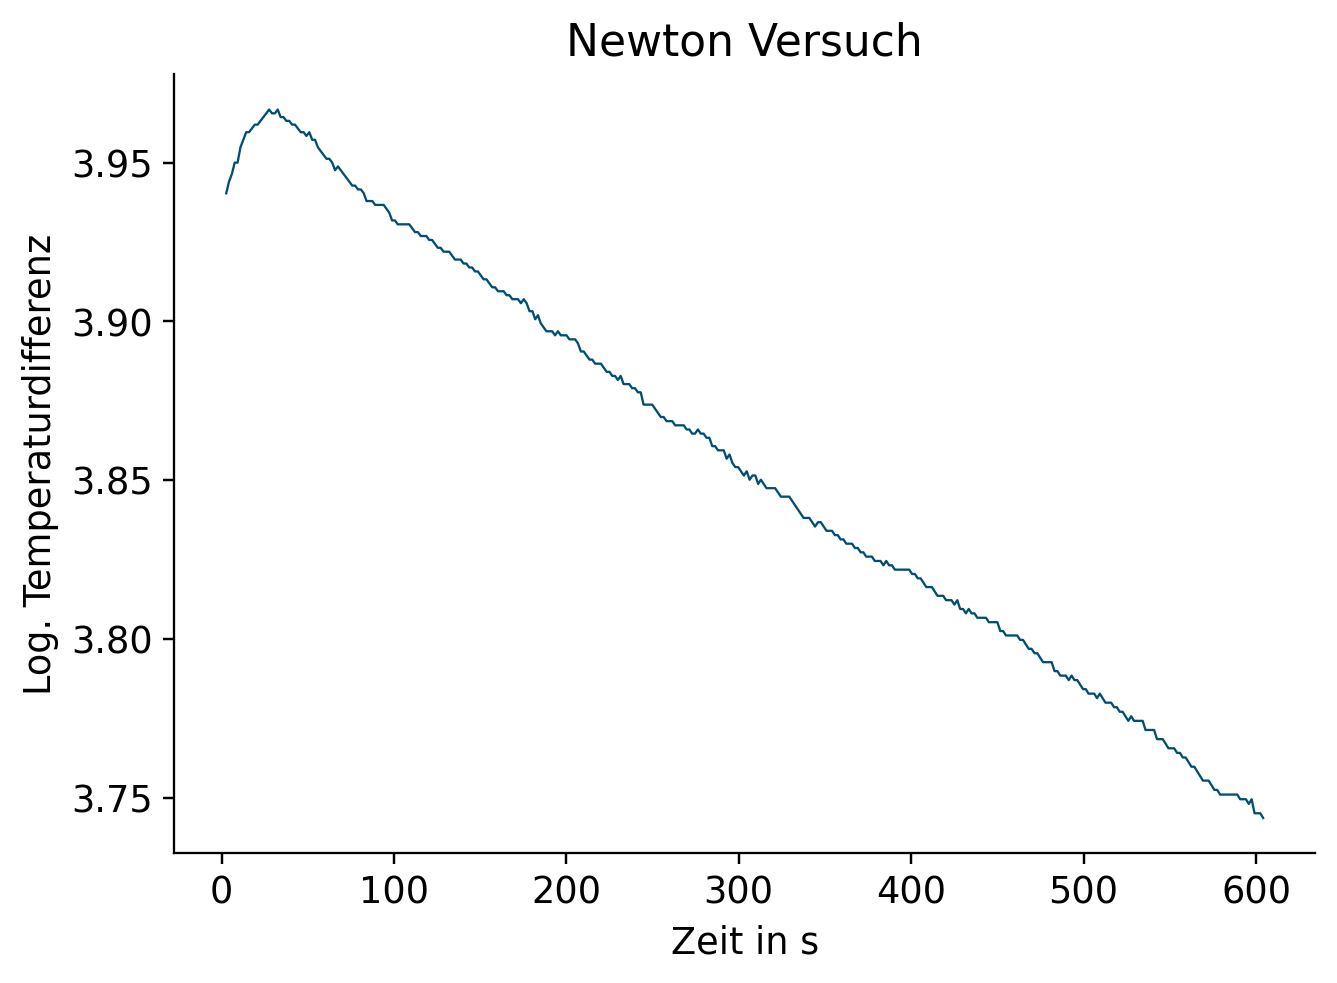

In [5]:
# TODO: Use the temperature and time data for plotting

temp_diff = temp_s_1_array - temp_s_2_array
log_temp_diff = np.log(temp_diff)
plt.plot(time_s_2_array, log_temp_diff)
plt.xlabel("Zeit in s")
plt.ylabel("Log. Temperaturdifferenz")

plt.title("Newton Versuch")

print(temp_diff, '°C')
# DONE #


#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [8]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz

Temp_sensor_2_kelvin = [0] * 364
for i in range(364):
    Temp_sensor_2_kelvin[i] = temp_s_2_array[i] + 273.15

coefficient = np.polyfit(time_s_2_array,temp_s_2_array,3)
#Annäherungsfunktion gefittet
fit_coefficient = np.poly1d(coefficient)
x_poly = np.linspace(0.5,600,364)

T1 = Temp_sensor_2_kelvin[0]
T2 = Temp_sensor_2_kelvin[363]
print(T1, 'K')
print(T2, 'K')
ln = np.log

T3 = T2 - T1

T4 = (fit_coefficient(x_poly))-T2

K = (ln(T4/T3))/x_poly

fitted_coeff_k = np.polyfit(x_poly, K, 4)
fit_k = np.poly1d(fitted_coeff_k)
y_plt = fit_k(x_poly)

# DONE #

291.275 K
291.0875 K


#### (iV) Ergebnis

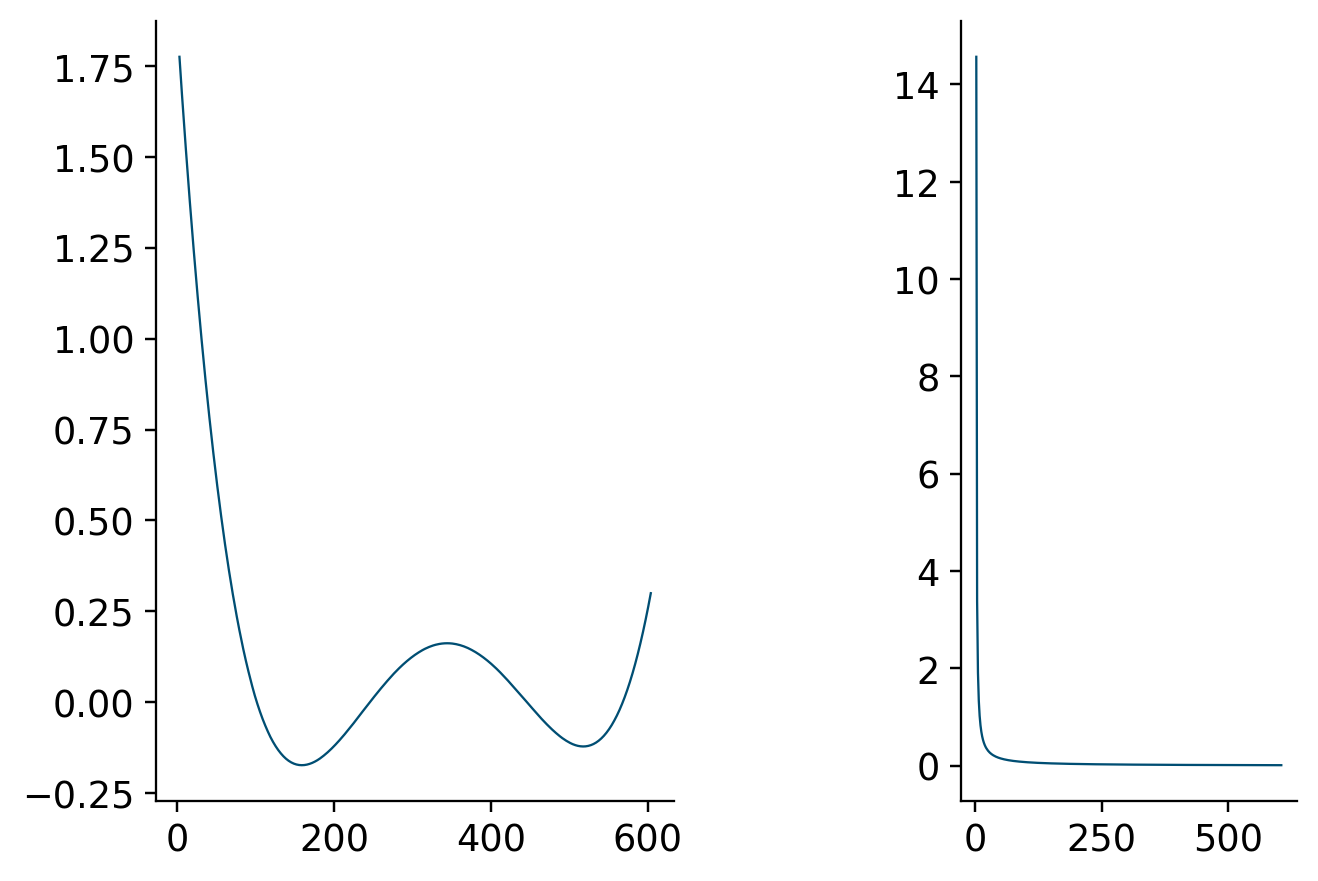

In [9]:
# TODO: Print result

plt.subplot(1,3,3)
plt.plot(time_s_2_array, K)

plt.subplot(1,2,1)
plt.plot(time_s_2_array, y_plt)

# DONE #

## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Bei der Betrachtung des Koeffizienten kommt es zur Abweichung, welche im ersten Plot sichtbar ist. Das ist auf die Ungenauigkeit der Sensoren unsaubere Durchführung, sowie Ungenauigkeiten, die durch das verwendete Gefäß entstehen, zu erklären. Widerrum ist der zweiter Plot sehr zufriedenstellend.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In [ ]:
Ich habe in diesem Versuch gelernt, das Newtonsche Abkühlgesetz anzuwenden und logarithmische Plots zu erstellen.